# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


### Merge the DataFrames

In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12
5,South Latoya,3/11/2019 12:26,9.52,2.000000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.930000e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.120000e+11
8,South Karenland,1/8/2019 3:28,35.09,8.000000e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.330000e+12


In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head() 

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [6]:
#  1. Get the total rides for each city type
G_Total_Rides_Type=pyber_data_df.groupby(["type"]).count()["ride_id"]
G_Total_Rides_Type  

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [7]:
# 2. Get the total drivers for each city type
G_Total_Drivers_Type= city_data_df.groupby(["type"]).sum()["driver_count"] 
G_Total_Drivers_Type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [8]:
#  3. Get the total amount of fares for each city type
G_Total_Fare_Type=pyber_data_df.groupby(["type"]).sum()["fare"]
G_Total_Fare_Type 

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
#  4. Get the average fare per ride for each city type. 
G_avg_fare_per_ride=G_Total_Fare_Type/G_Total_Rides_Type
G_avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [10]:
# 5. Get the average fare per driver for each city type. 
G_avg_fare_per_Driver=G_avg_fare_per_ride/G_Total_Drivers_Type
G_avg_fare_per_Driver

type
Rural       0.443890
Suburban    0.063204
Urban       0.010198
dtype: float64

In [11]:
#  6. Create a PyBer summary DataFrame. 
G_PyBer_Summary_DF=({
    "Total Rides":G_Total_Rides_Type,
    "Total Drivers":G_Total_Drivers_Type,
    "Total Fares":G_Total_Fare_Type,
    "Average Fare per Ride":G_avg_fare_per_ride,
    "Average Fare per Driver":G_avg_fare_per_Driver
})
G_Summary=pd.DataFrame(G_PyBer_Summary_DF)
G_Summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,0.443890
Suburban,625,490,19356.33,30.970128,0.063204
Urban,1625,2405,39854.38,24.525772,0.010198


In [12]:
#  7. Cleaning up the DataFrame. Delete the index name
G_Summary.index.name =None
G_Summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,0.443890
Suburban,625,490,19356.33,30.970128,0.063204
Urban,1625,2405,39854.38,24.525772,0.010198


In [13]:
#  8. Format the columns.
G_PyBer_Summary_DF["Total Rides"]=G_PyBer_Summary_DF["Total Rides"].map("{:,}".format)
G_PyBer_Summary_DF["Total Drivers"]=G_PyBer_Summary_DF["Total Drivers"].map("{:,}".format)
G_PyBer_Summary_DF["Total Fares"] =G_PyBer_Summary_DF ["Total Fares"].map("${:,.2f}".format)
G_PyBer_Summary_DF["Average Fare per Ride"] =G_PyBer_Summary_DF["Average Fare per Ride"].map("${:,.2f}".format)
G_PyBer_Summary_DF["Average Fare per Driver"] =G_PyBer_Summary_DF["Average Fare per Driver"].map("${:,.2f}".format)

In [14]:
G_PyBer_Summary_DF

{'Total Rides': Rural         125
 Suburban      625
 Urban       1,625
 Name: ride_id, dtype: object,
 'Total Drivers': type
 Rural          78
 Suburban      490
 Urban       2,405
 Name: driver_count, dtype: object,
 'Total Fares': type
 Rural        $4,327.93
 Suburban    $19,356.33
 Urban       $39,854.38
 Name: fare, dtype: object,
 'Average Fare per Ride': type
 Rural       $34.62
 Suburban    $30.97
 Urban       $24.53
 dtype: object,
 'Average Fare per Driver': type
 Rural       $0.44
 Suburban    $0.06
 Urban       $0.01
 dtype: object}

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [15]:
# 1. Read the merged DataFrame
pyber_data_df = pyber_data_df.rename(columns={
    "city": "city",
    "date": "Date",
    "fare": "Fare",
    "ride_id": "Ride id",
    "driver_count": "No. Drivers",
    "type": "City Type"   
})
pyber_data_df

,city,Date,Fare,Ride id,No. Drivers,City Type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550000e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.020000e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.780000e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.260000e+12,4,Rural


In [16]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_data_df.set_index(pyber_data_df["Date"], inplace=True)
pyber_data_df

,city,Date,Fare,Ride id,No. Drivers,City Type
Date,,,,,,
1/14/2019 10:14,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12,5,Urban
3/4/2019 18:24,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12,72,Urban
2/24/2019 4:29,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12,57,Urban
2/10/2019 23:22,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12,34,Urban
3/6/2019 4:28,South Jack,3/6/2019 4:28,34.58,3.910000e+12,46,Urban
...,...,...,...,...,...,...
4/29/2019 17:04,Michaelberg,4/29/2019 17:04,13.38,8.550000e+12,6,Rural
1/30/2019 0:05,Lake Latoyabury,1/30/2019 0:05,20.76,9.020000e+12,2,Rural
2/10/2019 21:03,North Jaime,2/10/2019 21:03,11.11,2.780000e+12,1,Rural


In [17]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
column_names = ["Date", "City Type", "Fare"]
pyber_cities_fare = pyber_data_df[column_names].copy()
pyber_cities_fare

,Date,City Type,Fare
Date,,,
1/14/2019 10:14,1/14/2019 10:14,Urban,13.83
3/4/2019 18:24,3/4/2019 18:24,Urban,30.24
2/24/2019 4:29,2/24/2019 4:29,Urban,33.44
2/10/2019 23:22,2/10/2019 23:22,Urban,23.44
3/6/2019 4:28,3/6/2019 4:28,Urban,34.58
...,...,...,...
4/29/2019 17:04,4/29/2019 17:04,Rural,13.38
1/30/2019 0:05,1/30/2019 0:05,Rural,20.76
2/10/2019 21:03,2/10/2019 21:03,Rural,11.11


In [19]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_cities_fare.drop(["Date"], axis=1, inplace=True)

In [20]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_cities_fare.index = pd.to_datetime(pyber_data_df.index)
pyber_cities_fare.head()

,City Type,Fare
Date,,
2019-01-14 10:14:00,Urban,13.83
2019-03-04 18:24:00,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:00,Urban,23.44
2019-03-06 04:28:00,Urban,34.58


In [21]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
sum_fare_by_type = pyber_cities_fare.groupby(["City Type", "Date"]).sum()["Fare"]
sum_fare_by_type

City Type  Date               
Rural      2019-01-01 09:45:00    43.69
           2019-01-02 11:18:00    52.12
           2019-01-03 19:51:00    19.90
           2019-01-04 03:31:00    24.88
           2019-01-06 07:38:00    47.33
                                  ...  
Urban      2019-05-08 04:20:00    21.99
           2019-05-08 04:39:00    18.45
           2019-05-08 07:29:00    18.55
           2019-05-08 11:38:00    19.77
           2019-05-08 13:10:00    18.04
Name: Fare, Length: 2364, dtype: float64

In [22]:
# 7. Check that the datatype for the index is datetime using df.info()
sum_fare_by_type = pyber_cities_fare.groupby(["City Type", "Date"]).sum()[["Fare"]]
sum_fare_by_type

Fare
City Type Date                      
Rural     2019-01-01 09:45:00  43.69
          2019-01-02 11:18:00  52.12
          2019-01-03 19:51:00  19.90
          2019-01-04 03:31:00  24.88
          2019-01-06 07:38:00  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:00  18.45
          2019-05-08 07:29:00  18.55
          2019-05-08 11:38:00  19.77
          2019-05-08 13:10:00  18.04

[2364 rows x 1 columns]

In [23]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
sum_fare_by_type = sum_fare_by_type.reset_index()
sum_fare_by_type



,City Type,Date,Fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 03:31:00,24.88
4,Rural,2019-01-06 07:38:00,47.33
...,...,...,...
2359,Urban,2019-05-08 04:20:00,21.99
2360,Urban,2019-05-08 04:39:00,18.45
2361,Urban,2019-05-08 07:29:00,18.55
2362,Urban,2019-05-08 11:38:00,19.77


In [24]:
sum_fare_by_type_pivot = sum_fare_by_type.pivot(index="Date", columns="City Type")["Fare"]
sum_fare_by_type_pivot.head(10)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
2019-01-01 09:45:00,43.69,NaN,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [25]:
fare_Jan_April = sum_fare_by_type_pivot.loc['2019-01-01': '2019-04-28']
fare_Jan_April.head(20)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
2019-01-01 09:45:00,43.69,NaN,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [26]:
weekly_fares_df = fare_Jan_April.resample("W").sum()
weekly_fares_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


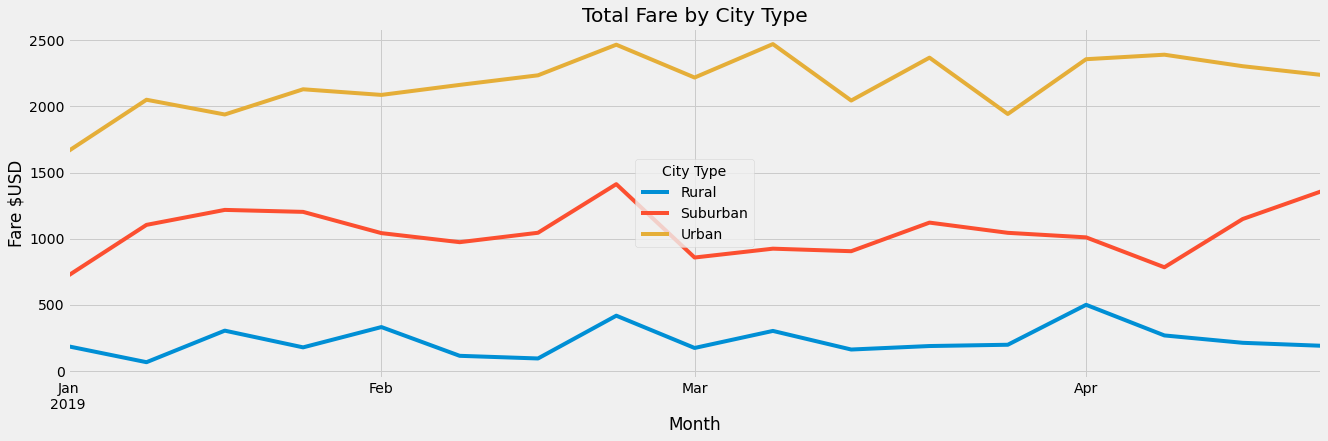

In [27]:
# 13 Use axes plotting to add labels and titles
from matplotlib import style
import matplotlib.pyplot as plt
style.use("fivethirtyeight")
ax = weekly_fares_df.plot(figsize=(20,6))
#Add a title
ax.set_title("Total Fare by City Type")
# Add a x- and y-axis label
ax.set_xlabel("Month")
ax.set_ylabel("Fare $USD")
plt.savefig("Challenge_fare_summary.png")
plt.show()